# 5_시계열 모델링  
# var + granger causality test

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import statsmodels as sm
from statsmodels.tsa.api import VAR

In [4]:
import warnings
warnings.filterwarnings(action='ignore')

## 1. final: 전체 판매량

In [5]:
dat = pd.read_csv("/content/gdrive/MyDrive/통계분석실습/기말프로젝트/data/final.csv")

In [6]:
dat = dat[['HYDKIA_sales', 'p_naver', 'search_HYDKIA']]

In [7]:
dat = dat[:len(dat)-1]

In [ ]:
# 비율이 아닌 개수로
# dat['p_naver'] = dat['p_naver']*100

In [ ]:
dat['HYDKIA_sales'] = dat['HYDKIA_sales'].astype(int)
# dat['p_naver'] = dat['p_naver'].astype(int)

In [ ]:
dat

,HYDKIA_sales,p_naver,search_HYDKIA
0,17825,0.33,975
1,25143,0.32,697
2,28715,0.36,770
3,23628,0.39,958
4,25165,0.25,706
5,25978,0.28,731
6,23444,0.36,1004
7,20981,0.36,733
8,20810,0.33,707
9,22962,0.30,871


정상성 확인

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_test(data, col):
    result = adfuller(data[col])
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('num of lags: %f' % result[2])
    print('num of observations: %f' % result[3])
    print('Critical values:')
    for k, v in result[4].items():
        print('\t%s: %.3f' % (k,v))

In [ ]:
print('ADF TEST 결과')
adf_test(dat, "HYDKIA_sales")

ADF TEST 결과
ADF Statistics: 1.966828
p-value: 0.998628
num of lags: 8.000000
num of observations: 13.000000
Critical values:
	1%: -4.069
	5%: -3.127
	10%: -2.702


In [ ]:
print('ADF TEST 결과')
adf_test(dat, "p_naver")

ADF TEST 결과
ADF Statistics: -3.944514
p-value: 0.001731
num of lags: 3.000000
num of observations: 18.000000
Critical values:
	1%: -3.859
	5%: -3.042
	10%: -2.661


In [ ]:
print('ADF TEST 결과')
adf_test(dat, "search_HYDKIA")

ADF TEST 결과
ADF Statistics: -1.795617
p-value: 0.382640
num of lags: 2.000000
num of observations: 19.000000
Critical values:
	1%: -3.833
	5%: -3.031
	10%: -2.656


In [ ]:
dat['HYDKIA_sales_1'] = dat['HYDKIA_sales'].diff()
dat['search_HYDKIA_1'] = dat['search_HYDKIA'].diff()
dat = dat.dropna()

In [ ]:
dat

,HYDKIA_sales,p_naver,search_HYDKIA,HYDKIA_sales_1,search_HYDKIA_1
1,25143,0.32,697,7318.0,-278.0
2,28715,0.36,770,3572.0,73.0
3,23628,0.39,958,-5087.0,188.0
4,25165,0.25,706,1537.0,-252.0
5,25978,0.28,731,813.0,25.0
6,23444,0.36,1004,-2534.0,273.0
7,20981,0.36,733,-2463.0,-271.0
8,20810,0.33,707,-171.0,-26.0
9,22962,0.30,871,2152.0,164.0
10,28691,0.34,747,5729.0,-124.0


In [ ]:
adf_test(dat, "HYDKIA_sales_1")

ADF Statistics: -4.019894
p-value: 0.001310
num of lags: 2.000000
num of observations: 18.000000
Critical values:
	1%: -3.859
	5%: -3.042
	10%: -2.661


In [ ]:
adf_test(dat, "search_HYDKIA_1")

ADF Statistics: -4.137927
p-value: 0.000838
num of lags: 3.000000
num of observations: 17.000000
Critical values:
	1%: -3.889
	5%: -3.054
	10%: -2.667


In [ ]:
dat = dat[['HYDKIA_sales_1', 'p_naver', 'search_HYDKIA_1']]

In [ ]:
model = VAR(dat)
results = model.fit(1)  # fit: 추정, lag=1
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 05, Dec, 2024
Time:                     01:40:59
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    21.2970
Nobs:                     20.0000    HQIC:                   20.8162
Log likelihood:          -280.132    FPE:                9.92754e+08
AIC:                      20.6996    Det(Omega_mle):     5.74510e+08
--------------------------------------------------------------------
Results for equation HYDKIA_sales_1
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                   2234.852424      8210.874387            0.272           0.785
L1.HYDKIA_sales_1         -0.334447         0.213915           -1.563           0.118
L1.p_naver             -9133.81

In [ ]:
# best lag 선택하기
results = model.fit(maxlags=3, ic='aic')

In [ ]:
# lag=2가 선택됨
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 05, Dec, 2024
Time:                     01:41:04
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    20.7284
Nobs:                     19.0000    HQIC:                   19.8612
Log likelihood:          -246.882    FPE:                3.94663e+08
AIC:                      19.6845    Det(Omega_mle):     1.54016e+08
--------------------------------------------------------------------
Results for equation HYDKIA_sales_1
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                   5840.839005     14795.705200            0.395           0.693
L1.HYDKIA_sales_1         -0.513255         0.264654           -1.939           0.052
L1.p_naver            -11939.19

In [ ]:
# 향후 5시점에 대해서 forecast
results.forecast(dat.values, 5)

array([[-7.18984521e+02,  2.94189464e-01,  4.67898472e+01],
       [-3.75557743e+02,  3.49687435e-01,  1.40482357e+02],
       [-9.41894149e+02,  3.39935303e-01, -1.48863396e+02],
       [-1.00514862e+03,  3.08705848e-01,  2.74012022e+01],
       [-5.65946007e+02,  3.39328621e-01,  9.29616293e+01]])

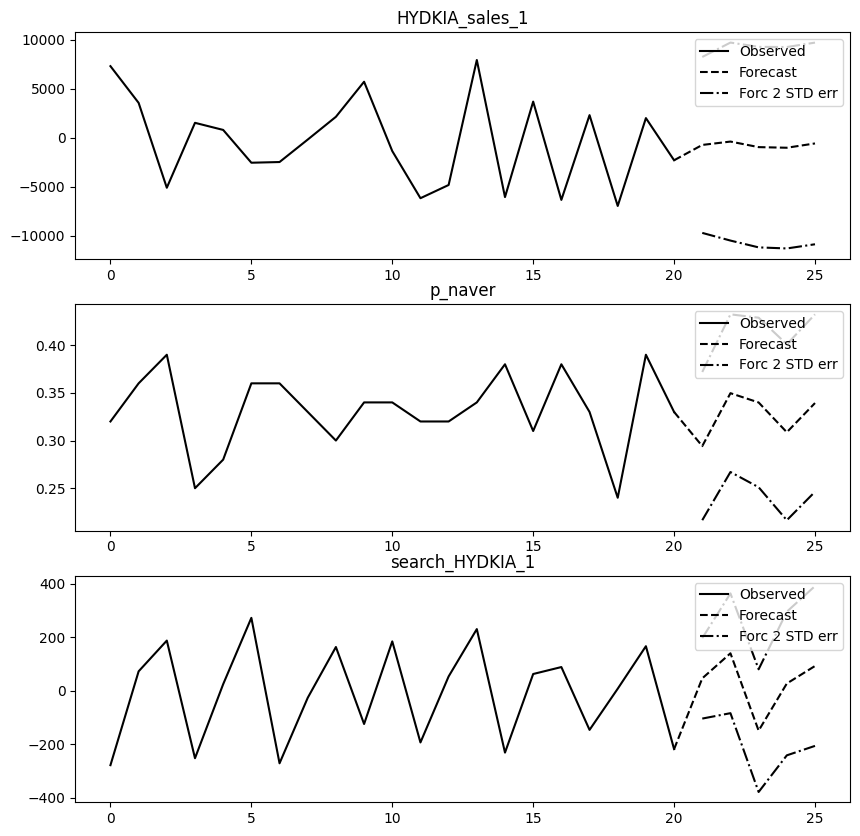

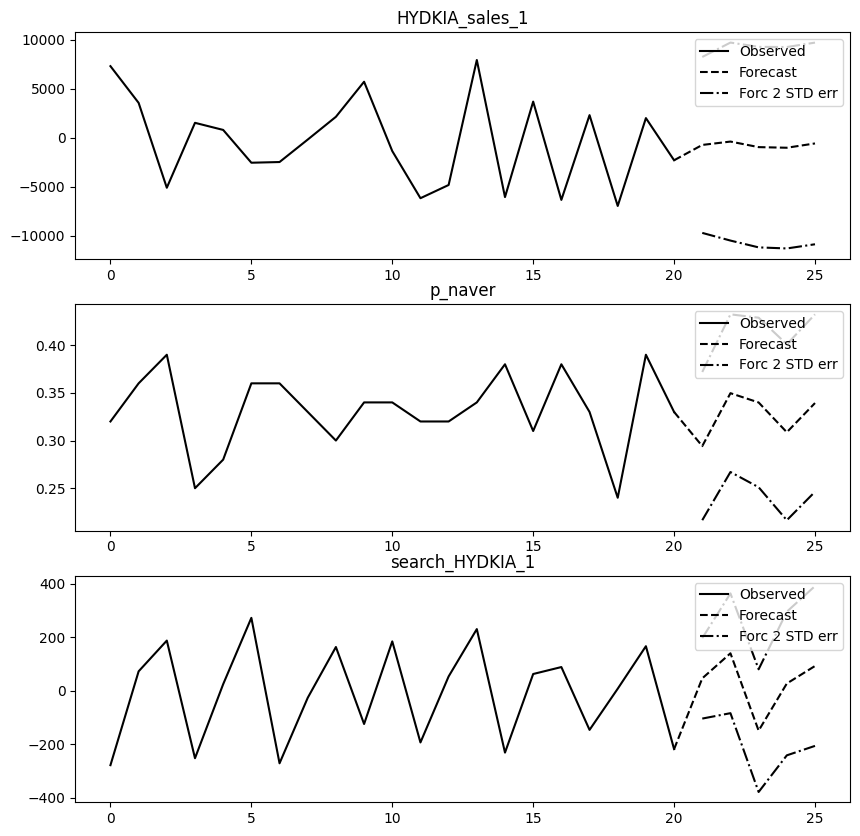

In [ ]:
results.plot_forecast(5)

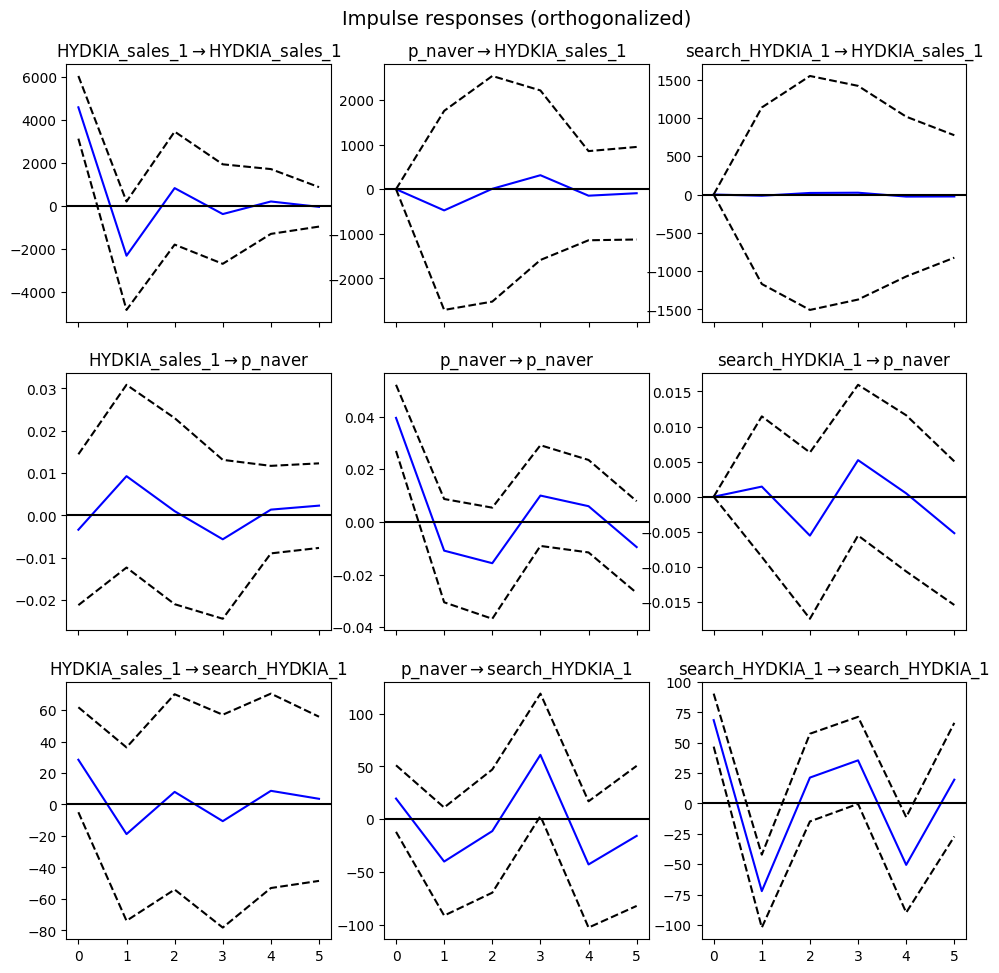

In [ ]:
irf = results.irf(5)
_ = irf.plot(orth=True)
# 외생적이다 = 서로 상호연관이 크다

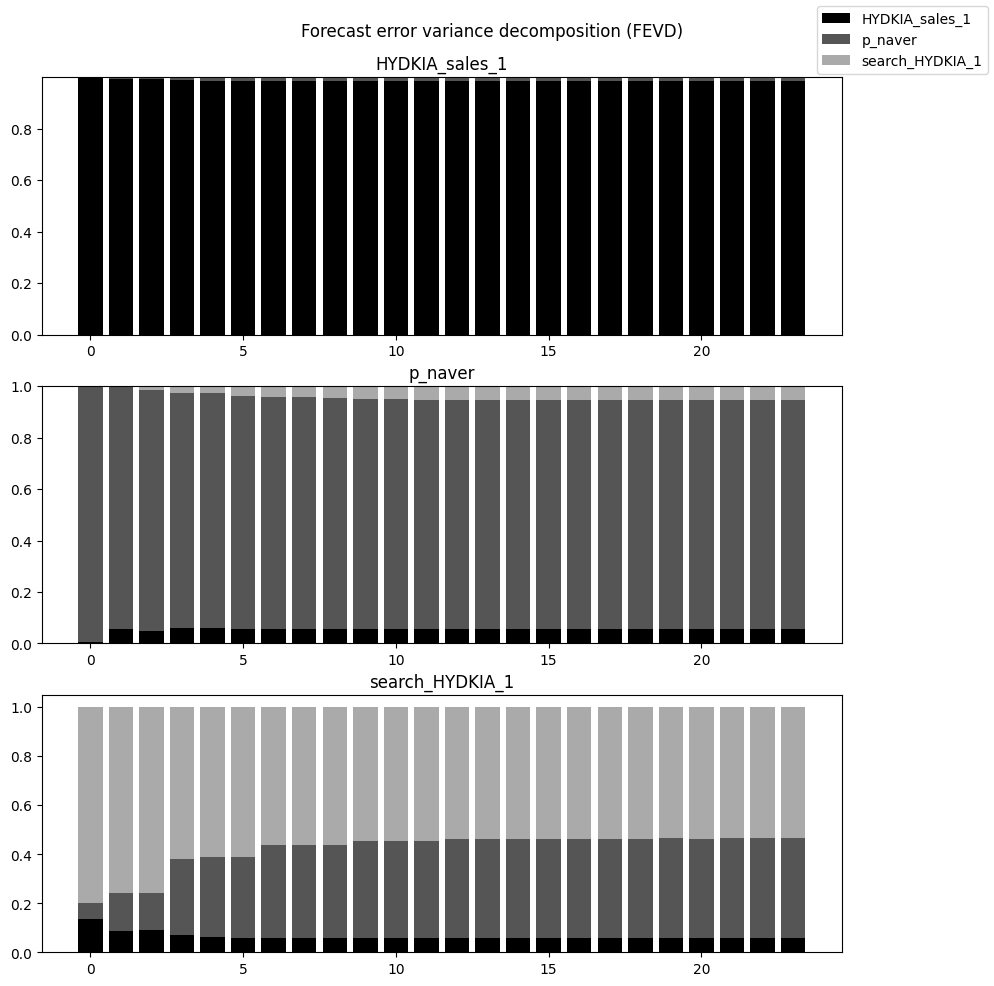

In [ ]:
# 충격 분해: 검은색 크다 = 미치는 영향 크다
fevd = results.fevd(5)
_ = results.fevd(24).plot()

In [ ]:
# granger causality test
# results.test_causality('IP', 'ESI').summary(): ESI가 IP를 cause하냐?
# results.test_causality('ESI', 'IP').summary(): IP가 ESI를 cause하냐?
# 일방향으로 영향: 보다 더 유의미
# 상호관계 => 인과관계 X
# granger causlity 논리적인 인과관계 X -> 시간적인 인과관계 가정 가능 O = 그래인저 인과관계가 있다

In [ ]:
results.test_causality('HYDKIA_sales_1','p_naver').summary()

Test statistic,Critical value,p-value,df
0.1184,3.259,0.889,"(2, 36)"


In [ ]:
results.test_causality('p_naver','HYDKIA_sales_1').summary()

Test statistic,Critical value,p-value,df
0.4410,3.259,0.647,"(2, 36)"


In [ ]:
results.test_causality('HYDKIA_sales_1','search_HYDKIA_1').summary()

Test statistic,Critical value,p-value,df
0.001448,3.259,0.999,"(2, 36)"


In [ ]:
results.test_causality('search_HYDKIA_1','HYDKIA_sales_1').summary()

Test statistic,Critical value,p-value,df
0.3703,3.259,0.693,"(2, 36)"


## 2. final2: 차종별 판매량

In [ ]:
dat = pd.read_csv("/content/gdrive/MyDrive/통계분석실습/기말프로젝트/data/final2.csv")

In [ ]:
dat

,year_month,search,search_modelY,search_model3,p_naver,n_naver,pnr_naver,p_foreign,n_foreign,pnr_foreign,sales,previous_month_sales,month,model_EV9,model_IONIQ5,model_IONIQ6
0,2023-01,398,315,257,0.33,0.19,1.73,0.50,0.00,10.00,7065.0,10265.0,1,0,1,0
1,2023-02,277,201,184,0.32,0.09,3.52,0.50,0.00,10.00,9756.0,7065.0,2,0,1,0
2,2023-03,269,191,178,0.36,0.10,3.56,0.75,0.25,2.73,9175.0,9756.0,3,0,1,0
3,2023-04,339,307,257,0.39,0.05,7.65,1.00,0.00,20.00,9597.0,9175.0,4,0,1,0
4,2023-05,254,212,187,0.25,0.11,2.25,0.75,0.00,30.00,10638.0,9597.0,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2024-07,177,220,218,0.33,0.07,4.65,0.73,0.27,2.58,1863.0,1597.0,7,1,0,0
88,2024-08,183,223,214,0.24,0.16,1.49,0.56,0.44,1.22,1414.0,1863.0,8,1,0,0
89,2024-09,227,278,253,0.39,0.10,3.86,0.78,0.22,3.33,1300.0,1414.0,9,1,0,0
90,2024-10,166,235,215,0.33,0.20,1.64,0.25,0.25,0.91,1084.0,1300.0,10,1,0,0


In [ ]:
dat = dat[['sales', 'search', 'pnr_naver']]

In [ ]:
dat1 = dat[0:22]

In [ ]:
dat2 = dat[23:45]

In [ ]:
dat3 = dat[46:68]

In [ ]:
dat4 = dat[69:91]



---



In [ ]:
print('ADF TEST 결과')
adf_test(dat1, "sales")

ADF TEST 결과
ADF Statistics: -1.391355
p-value: 0.586413
num of lags: 9.000000
num of observations: 12.000000
Critical values:
	1%: -4.138
	5%: -3.155
	10%: -2.714


In [ ]:
print('ADF TEST 결과')
adf_test(dat1, "search")

ADF TEST 결과
ADF Statistics: -6.163328
p-value: 0.000000
num of lags: 0.000000
num of observations: 21.000000
Critical values:
	1%: -3.788
	5%: -3.013
	10%: -2.646


In [ ]:
print('ADF TEST 결과')
adf_test(dat1, "pnr_naver")

ADF TEST 결과
ADF Statistics: -1.945511
p-value: 0.310963
num of lags: 9.000000
num of observations: 12.000000
Critical values:
	1%: -4.138
	5%: -3.155
	10%: -2.714


In [ ]:
dat1['sales_1'] = dat1['sales'].diff()
dat1['pnr_naver_1'] = dat1['pnr_naver'].diff()
dat1 = dat1.dropna()

In [ ]:
dat1

,sales,search,pnr_naver,sales_1,pnr_naver_1
1,9756.0,277,3.52,2691.0,1.79
2,9175.0,269,3.56,-581.0,0.04
3,9597.0,339,7.65,422.0,4.09
4,10638.0,254,2.25,1041.0,-5.40
5,9020.0,260,6.83,-1618.0,4.58
6,8565.0,412,2.98,-455.0,-3.85
7,7786.0,271,3.24,-779.0,0.26
8,6872.0,265,2.73,-914.0,-0.51
9,9045.0,332,2.70,2173.0,-0.03
10,8937.0,286,3.74,-108.0,1.04


In [ ]:
print('ADF TEST 결과')
adf_test(dat1, "sales_1")

ADF TEST 결과
ADF Statistics: -3.148057
p-value: 0.023195
num of lags: 2.000000
num of observations: 18.000000
Critical values:
	1%: -3.859
	5%: -3.042
	10%: -2.661


In [ ]:
print('ADF TEST 결과')
adf_test(dat1, "pnr_naver_1")

ADF TEST 결과
ADF Statistics: -5.593933
p-value: 0.000001
num of lags: 1.000000
num of observations: 19.000000
Critical values:
	1%: -3.833
	5%: -3.031
	10%: -2.656


In [ ]:
dat1 = dat1[['sales_1', 'search', 'pnr_naver_1']]

In [ ]:
model1 = VAR(dat1)
# best lag 선택하기
results1 = model1.fit(maxlags=3, ic='aic')

In [ ]:
results1.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 05, Dec, 2024
Time:                     01:49:23
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    25.3611
Nobs:                     20.0000    HQIC:                   24.8803
Log likelihood:          -320.773    FPE:                5.77892e+10
AIC:                      24.7637    Det(Omega_mle):     3.34428e+10
--------------------------------------------------------------------
Results for equation sales_1
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                448.330110      2099.126998            0.214           0.831
L1.sales_1            -0.590246         0.181431           -3.253           0.001
L1.search             -2.074638         6.770142      

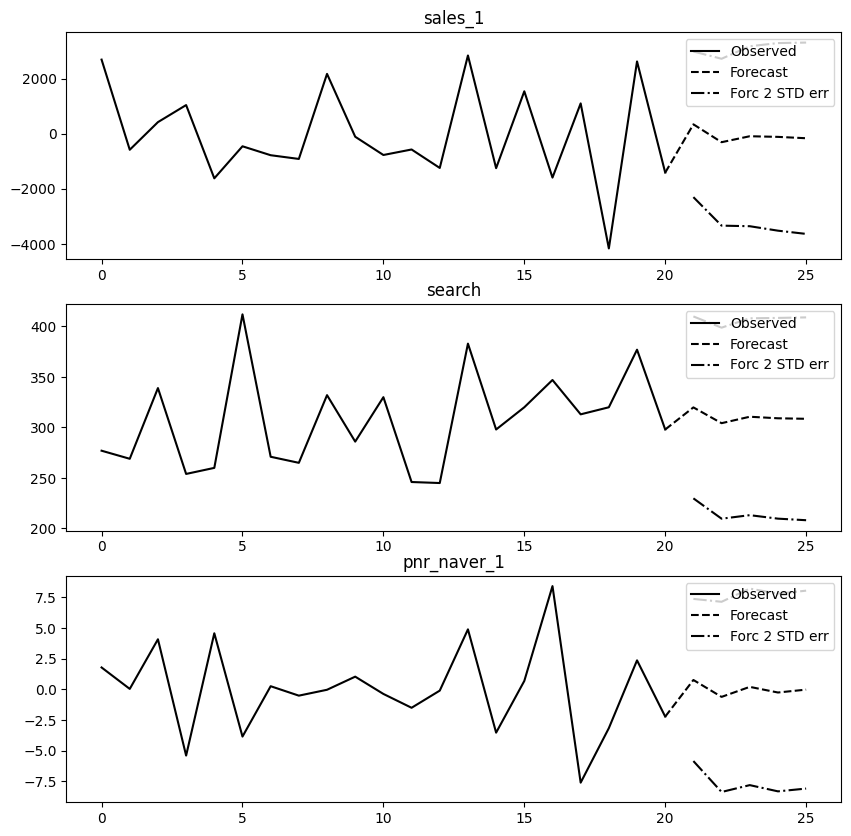

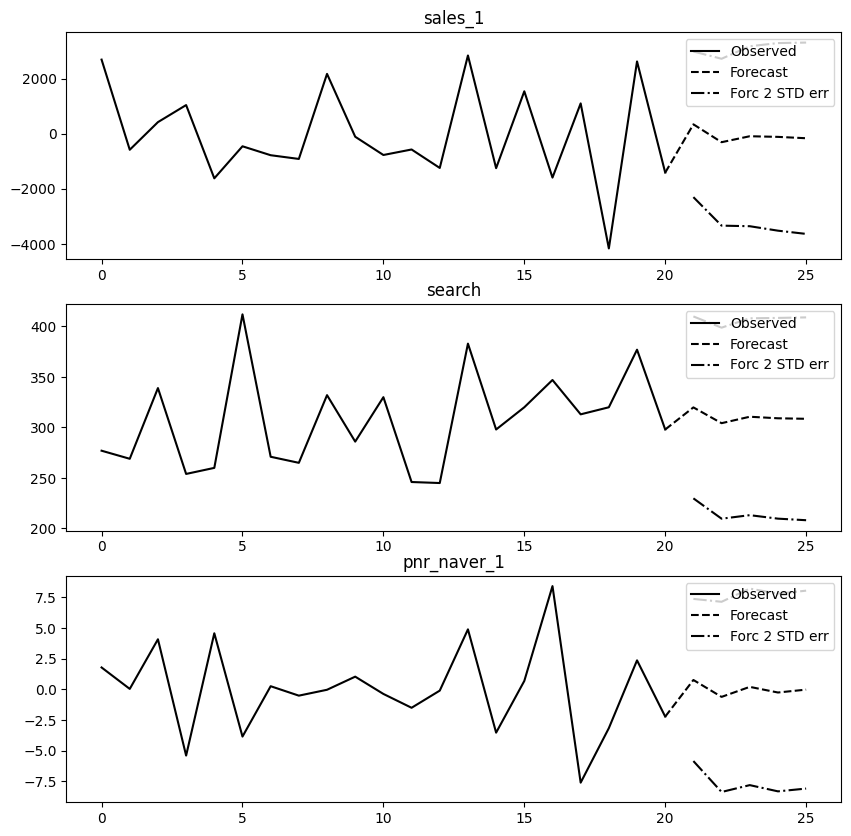

In [ ]:
results1.plot_forecast(5)

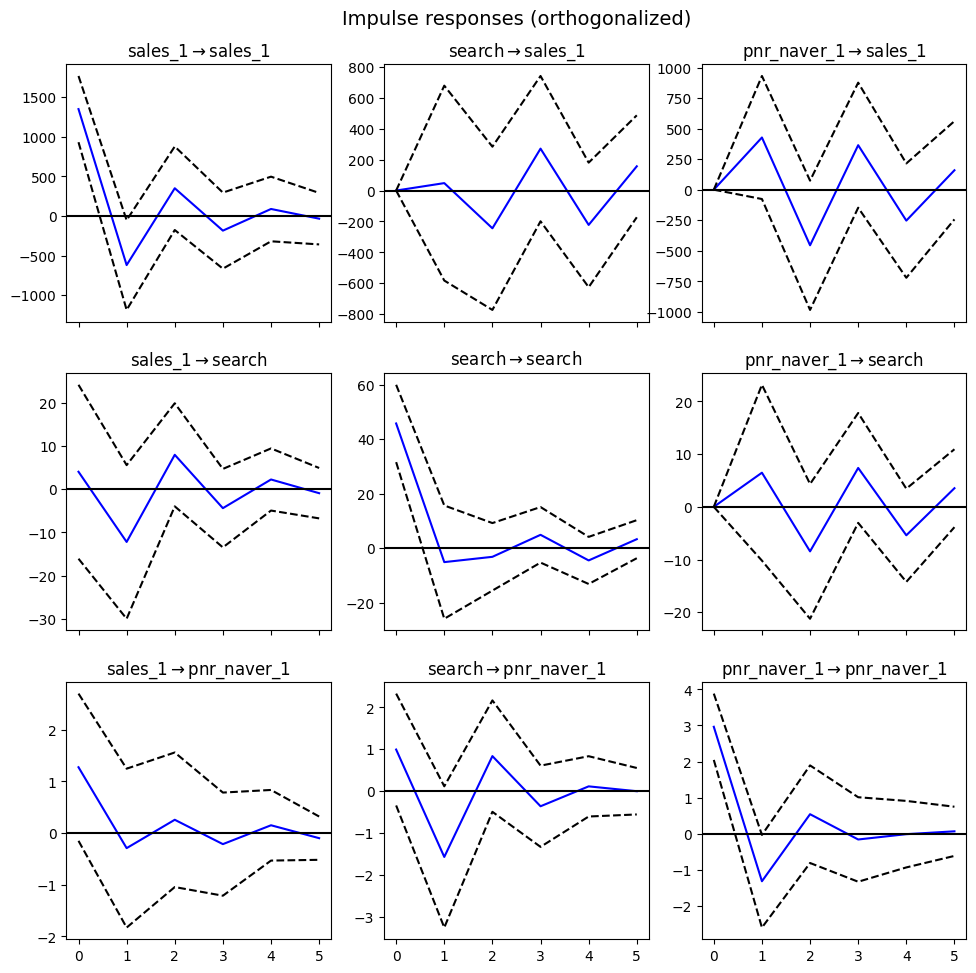

In [ ]:
irf1 = results1.irf(5)
_ = irf1.plot(orth=True)

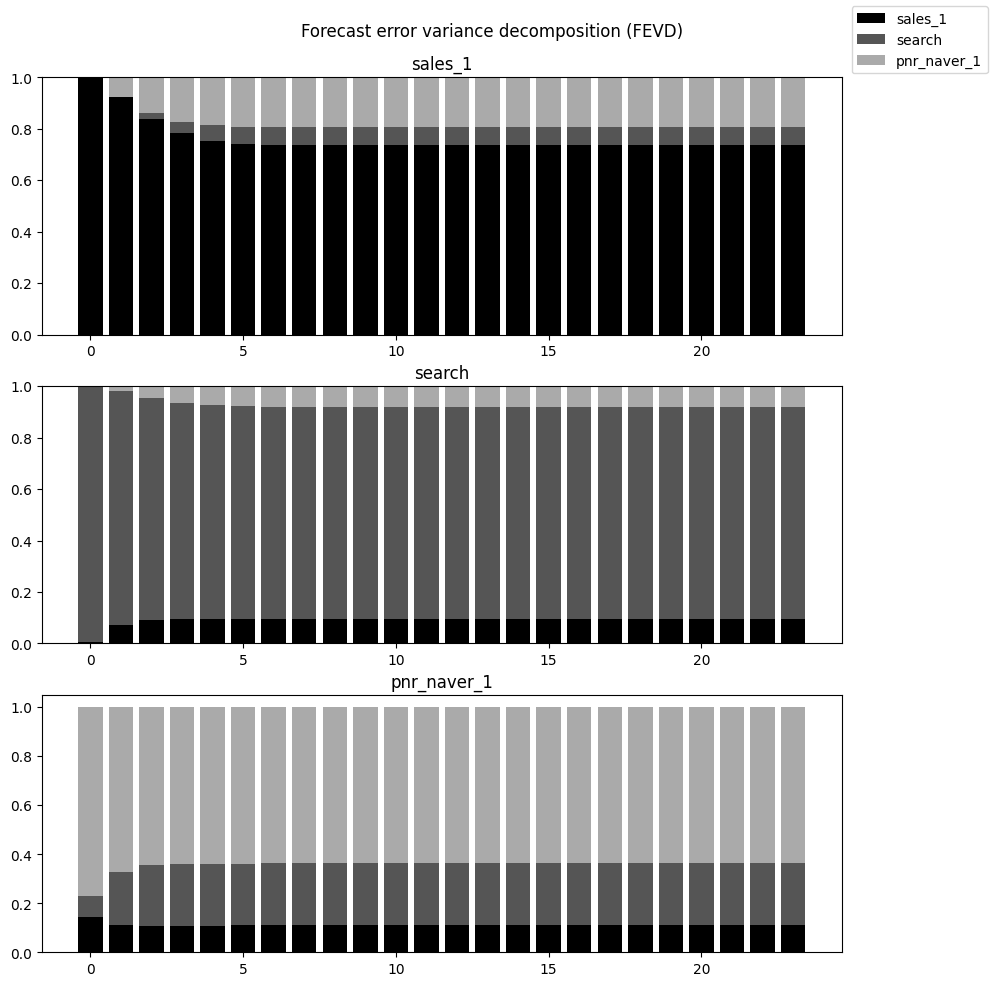

In [ ]:
fevd1 = results1.fevd(5)
_ = results1.fevd(24).plot()

In [ ]:
results1.test_causality('sales_1','search').summary()

Test statistic,Critical value,p-value,df
0.09391,4.043,0.761,"(1, 48)"


In [ ]:
results1.test_causality('sales_1','pnr_naver_1').summary()

Test statistic,Critical value,p-value,df
2.970,4.043,0.091,"(1, 48)"




---



In [ ]:
print('ADF TEST 결과')
adf_test(dat2, "sales")

ADF TEST 결과
ADF Statistics: -2.174918
p-value: 0.215474
num of lags: 9.000000
num of observations: 12.000000
Critical values:
	1%: -4.138
	5%: -3.155
	10%: -2.714


In [ ]:
print('ADF TEST 결과')
adf_test(dat2, "search")

ADF TEST 결과
ADF Statistics: -4.216718
p-value: 0.000617
num of lags: 0.000000
num of observations: 21.000000
Critical values:
	1%: -3.788
	5%: -3.013
	10%: -2.646


In [ ]:
print('ADF TEST 결과')
adf_test(dat2, "pnr_naver")

ADF TEST 결과
ADF Statistics: -1.945511
p-value: 0.310963
num of lags: 9.000000
num of observations: 12.000000
Critical values:
	1%: -4.138
	5%: -3.155
	10%: -2.714


In [ ]:
dat2['sales_1'] = dat2['sales'].diff()
dat2['pnr_naver_1'] = dat2['pnr_naver'].diff()
dat2 = dat2.dropna()

In [ ]:
print('ADF TEST 결과')
adf_test(dat2, "sales_1")

ADF TEST 결과
ADF Statistics: -5.229873
p-value: 0.000008
num of lags: 0.000000
num of observations: 20.000000
Critical values:
	1%: -3.809
	5%: -3.022
	10%: -2.651


In [ ]:
print('ADF TEST 결과')
adf_test(dat2, "pnr_naver_1")

ADF TEST 결과
ADF Statistics: -5.593933
p-value: 0.000001
num of lags: 1.000000
num of observations: 19.000000
Critical values:
	1%: -3.833
	5%: -3.031
	10%: -2.656


In [ ]:
dat2 = dat2[['sales_1', 'search', 'pnr_naver_1']]

In [ ]:
model2 = VAR(dat2)
# best lag 선택하기
results2 = model2.fit(maxlags=3, ic='aic')

In [ ]:
results2.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 05, Dec, 2024
Time:                     01:54:47
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    23.5816
Nobs:                     21.0000    HQIC:                   23.4647
Log likelihood:          -332.433    FPE:                1.50186e+10
AIC:                      23.4323    Det(Omega_mle):     1.30623e+10
--------------------------------------------------------------------
Results for equation sales_1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const      -102.904762       334.816040           -0.307           0.759

Results for equation search
           coefficient       std. error           t-stat            prob
-------------------------------------------------------------

In [ ]:
results2.plot_forecast(5)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
irf2 = results2.irf(5)
_ = irf2.plot(orth=True)

ValueError: need at least one array to concatenate

In [ ]:
fevd2 = results2.fevd(5)
_ = results2.fevd(24).plot()

ValueError: need at least one array to concatenate

In [ ]:
results2.test_causality('sales_1','search').summary()

RuntimeError: Cannot test Granger Causality in a model with 0 lags.

In [ ]:
results2.test_causality('sales','pnr_naver_1').summary()



---



In [ ]:
print('ADF TEST 결과')
adf_test(dat3, "sales")

ADF TEST 결과
ADF Statistics: 1.882250
p-value: 0.998499
num of lags: 9.000000
num of observations: 12.000000
Critical values:
	1%: -4.138
	5%: -3.155
	10%: -2.714


In [ ]:
print('ADF TEST 결과')
adf_test(dat3, "search")

ADF TEST 결과
ADF Statistics: -1.516761
p-value: 0.525204
num of lags: 2.000000
num of observations: 19.000000
Critical values:
	1%: -3.833
	5%: -3.031
	10%: -2.656


In [ ]:
print('ADF TEST 결과')
adf_test(dat3, "pnr_naver")

ADF TEST 결과
ADF Statistics: -1.945511
p-value: 0.310963
num of lags: 9.000000
num of observations: 12.000000
Critical values:
	1%: -4.138
	5%: -3.155
	10%: -2.714


In [ ]:
dat3['sales_1'] = dat3['sales'].diff()
dat3['search_1'] = dat3['search'].diff()
dat3['pnr_naver_1'] = dat3['pnr_naver'].diff()
dat3 = dat3.dropna()

In [ ]:
print('ADF TEST 결과')
adf_test(dat3, "sales_1")

ADF TEST 결과
ADF Statistics: -5.676306
p-value: 0.000001
num of lags: 0.000000
num of observations: 20.000000
Critical values:
	1%: -3.809
	5%: -3.022
	10%: -2.651


In [ ]:
print('ADF TEST 결과')
adf_test(dat3, "search_1")

ADF TEST 결과
ADF Statistics: -17.502312
p-value: 0.000000
num of lags: 1.000000
num of observations: 19.000000
Critical values:
	1%: -3.833
	5%: -3.031
	10%: -2.656


In [ ]:
print('ADF TEST 결과')
adf_test(dat3, "pnr_naver_1")

ADF TEST 결과
ADF Statistics: -5.593933
p-value: 0.000001
num of lags: 1.000000
num of observations: 19.000000
Critical values:
	1%: -3.833
	5%: -3.031
	10%: -2.656


In [ ]:
dat3 = dat3[['sales_1', 'search_1', 'pnr_naver_1']]

In [ ]:
model3 = VAR(dat3)
# best lag 선택하기
results3 = model3.fit(maxlags=3, ic='aic')

In [ ]:
results3.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 05, Dec, 2024
Time:                     01:58:32
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    24.7891
Nobs:                     19.0000    HQIC:                   23.9219
Log likelihood:          -285.459    FPE:                2.28964e+10
AIC:                      23.7452    Det(Omega_mle):     8.93526e+09
--------------------------------------------------------------------
Results for equation sales_1
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const               -686.562971       421.517545           -1.629           0.103
L1.sales_1            -0.382712         0.248006           -1.543           0.123
L1.search_1            4.406810         9.911752      

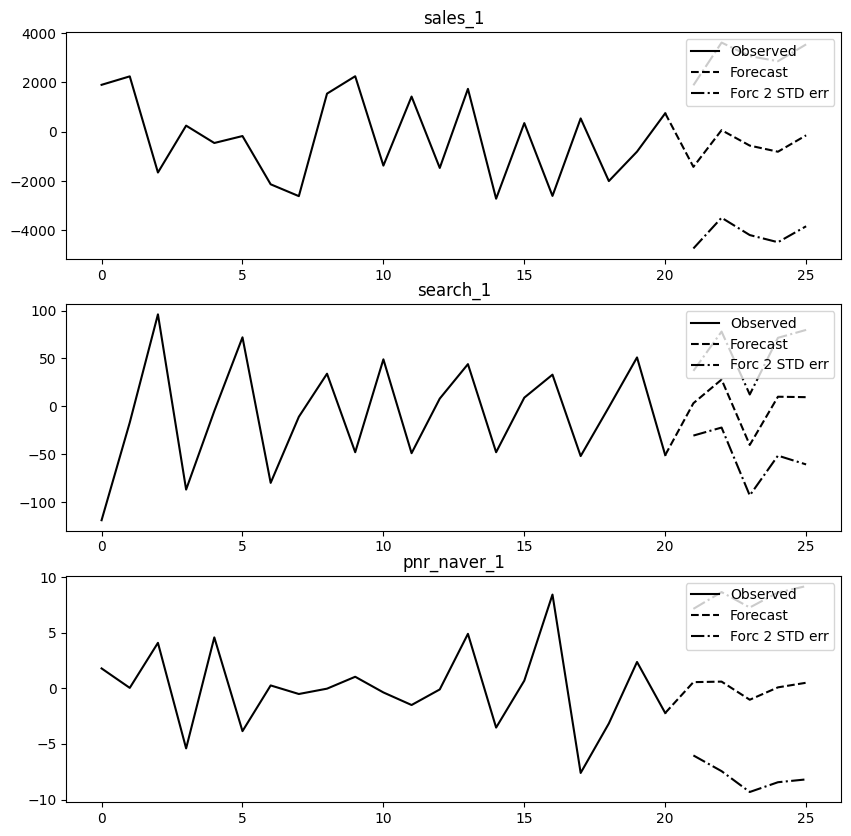

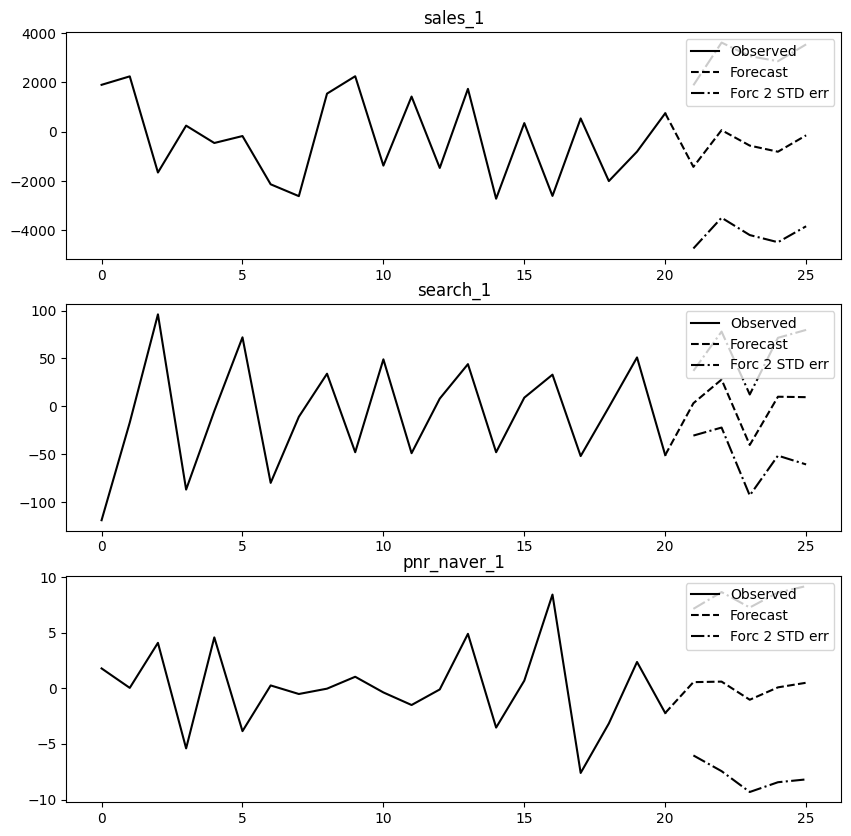

In [ ]:
results3.plot_forecast(5)

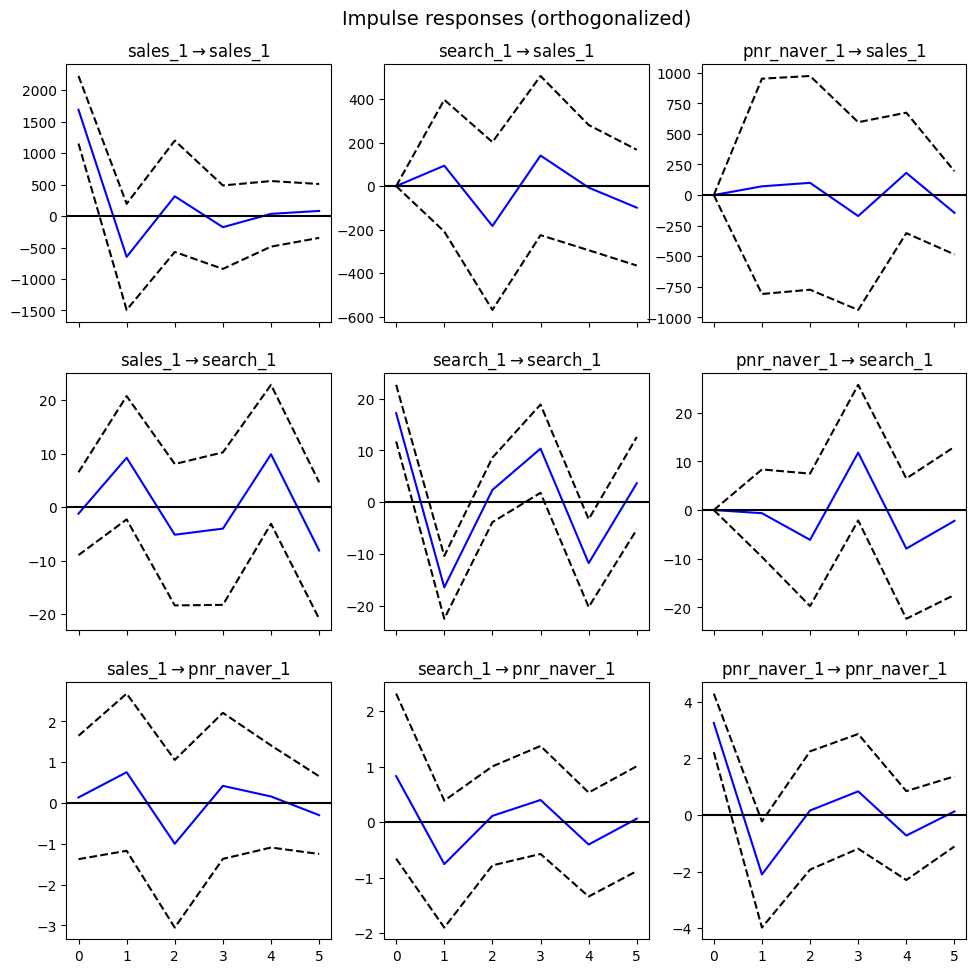

In [ ]:
irf3 = results3.irf(5)
_ = irf3.plot(orth=True)

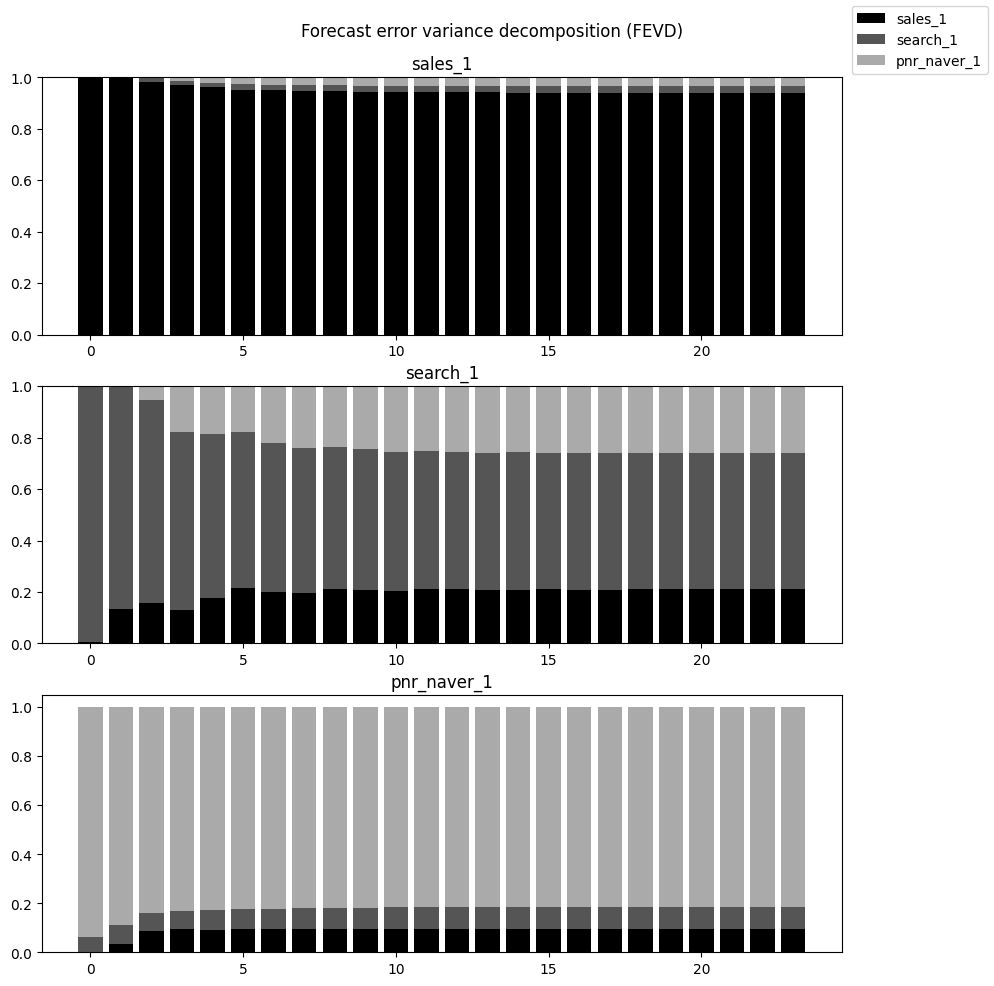

In [ ]:
fevd3 = results3.fevd(5)
_ = results3.fevd(24).plot()

In [ ]:
results3.test_causality('sales_1','search_1').summary()

Test statistic,Critical value,p-value,df
0.5850,3.259,0.562,"(2, 36)"


In [ ]:
results3.test_causality('sales_1','pnr_naver_1').summary()

Test statistic,Critical value,p-value,df
0.08800,3.259,0.916,"(2, 36)"




---



In [ ]:
print('ADF TEST 결과')
adf_test(dat4, "sales")

ADF TEST 결과
ADF Statistics: -2.537590
p-value: 0.106594
num of lags: 9.000000
num of observations: 12.000000
Critical values:
	1%: -4.138
	5%: -3.155
	10%: -2.714


In [ ]:
print('ADF TEST 결과')
adf_test(dat4, "search")

ADF TEST 결과
ADF Statistics: -2.301994
p-value: 0.171326
num of lags: 0.000000
num of observations: 21.000000
Critical values:
	1%: -3.788
	5%: -3.013
	10%: -2.646


In [ ]:
print('ADF TEST 결과')
adf_test(dat4, "pnr_naver")

ADF TEST 결과
ADF Statistics: -1.945511
p-value: 0.310963
num of lags: 9.000000
num of observations: 12.000000
Critical values:
	1%: -4.138
	5%: -3.155
	10%: -2.714


In [ ]:
dat4['sales_1'] = dat4['sales'].diff()
dat4['search_1'] = dat4['search'].diff()
dat4['pnr_naver_1'] = dat4['pnr_naver'].diff()
dat4 = dat4.dropna()

In [ ]:
print('ADF TEST 결과')
adf_test(dat4, "sales_1")

ADF TEST 결과
ADF Statistics: -4.317325
p-value: 0.000415
num of lags: 0.000000
num of observations: 20.000000
Critical values:
	1%: -3.809
	5%: -3.022
	10%: -2.651


In [ ]:
print('ADF TEST 결과')
adf_test(dat4, "search_1")

ADF TEST 결과
ADF Statistics: -5.981709
p-value: 0.000000
num of lags: 0.000000
num of observations: 20.000000
Critical values:
	1%: -3.809
	5%: -3.022
	10%: -2.651


In [ ]:
print('ADF TEST 결과')
adf_test(dat4, "pnr_naver_1")

ADF TEST 결과
ADF Statistics: -5.593933
p-value: 0.000001
num of lags: 1.000000
num of observations: 19.000000
Critical values:
	1%: -3.833
	5%: -3.031
	10%: -2.656


In [ ]:
dat4 = dat4[['sales_1', 'search_1', 'pnr_naver_1']]

In [ ]:
model4 = VAR(dat4)
# best lag 선택하기
results4 = model4.fit(maxlags=3, ic='aic')

In [ ]:
results4.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 05, Dec, 2024
Time:                     02:03:00
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    25.3656
Nobs:                     21.0000    HQIC:                   25.2488
Log likelihood:          -351.165    FPE:                8.94216e+10
AIC:                      25.2164    Det(Omega_mle):     7.77736e+10
--------------------------------------------------------------------
Results for equation sales_1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        51.619048       427.431429            0.121           0.904

Results for equation search_1
           coefficient       std. error           t-stat            prob
-----------------------------------------------------------

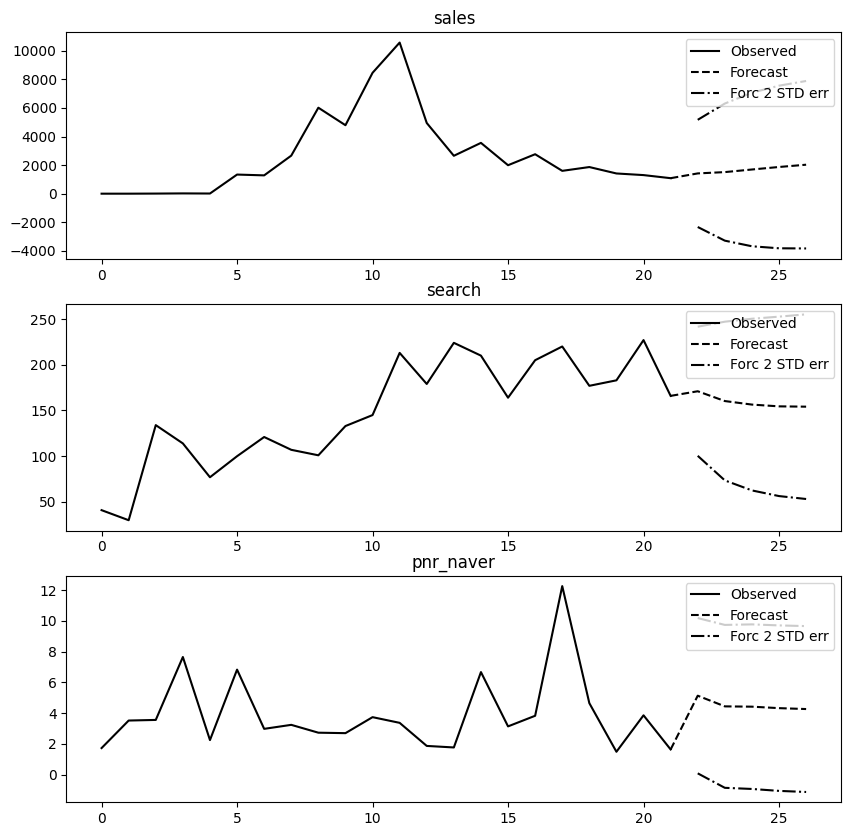

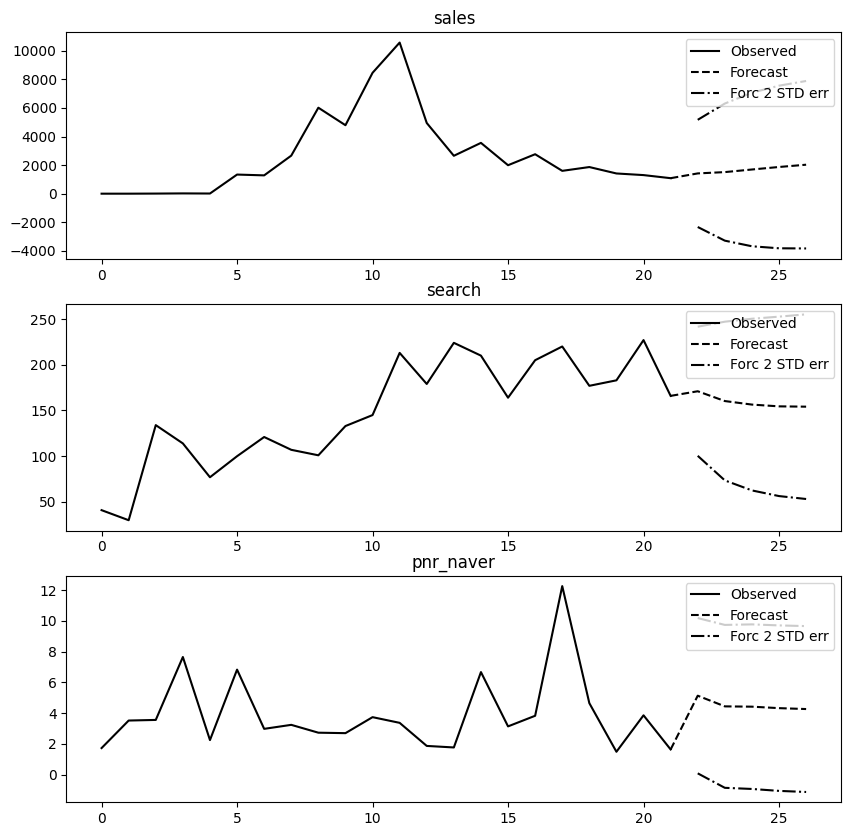

In [ ]:
results4.plot_forecast(5)

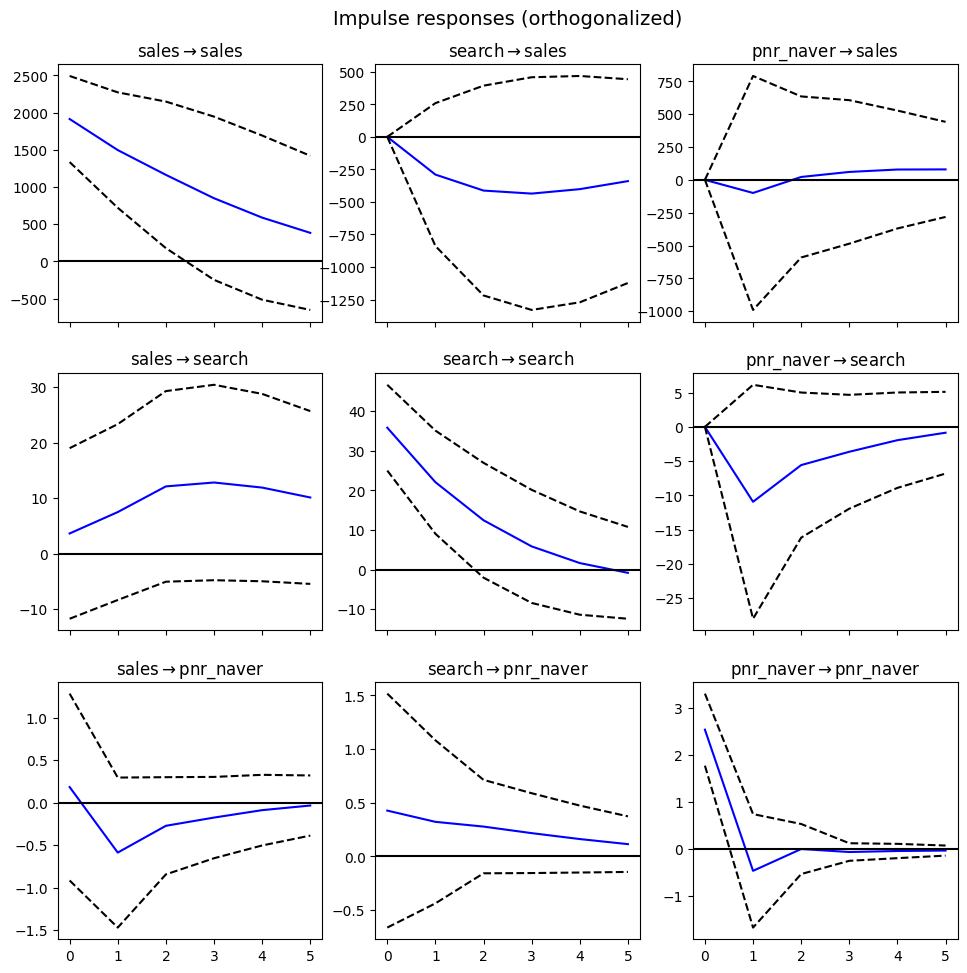

In [ ]:
irf4 = results4.irf(5)
_ = irf4.plot(orth=True)

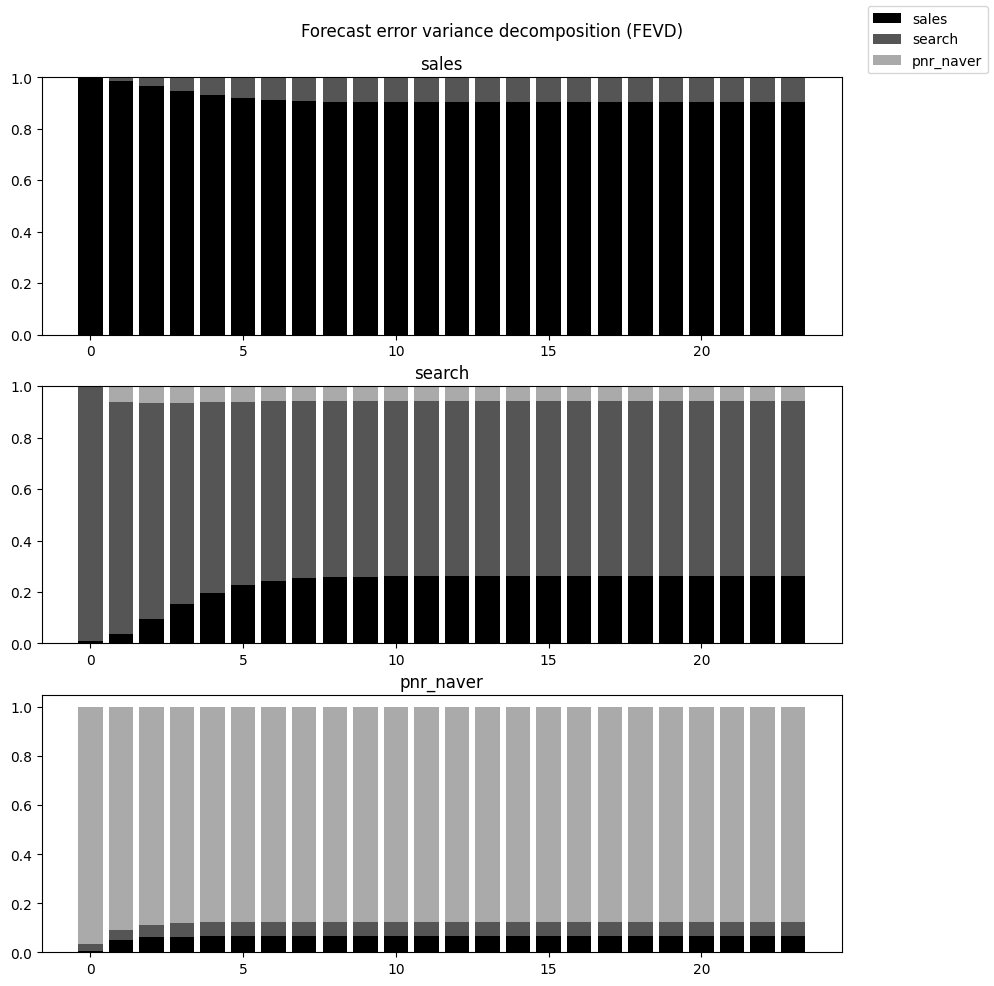

In [ ]:
fevd4 = results4.fevd(5)
_ = results4.fevd(24).plot()

In [ ]:
results4.test_causality('sales','search').summary()

Test statistic,Critical value,p-value,df
0.8958,4.030,0.348,"(1, 51)"


In [ ]:
results4.test_causality('sales','pnr_naver').summary()

Test statistic,Critical value,p-value,df
0.04809,4.030,0.827,"(1, 51)"
